In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 4)
import pandas as pd
import numpy as np

try:
    lgbt = pd.read_csv("european-union-lgbt-survey-2012/LGBT_Survey_ViolenceAndHarassment.csv")
except IOError:
    lgbt = pd.read_csv("LGBT_Survey_ViolenceAndHarassment.csv")

lgbt = lgbt.drop(['notes'], axis=1)
lgbt['percentage'] = [int(x) for x in lgbt['percentage']]
bad_rows = lgbt[lgbt['percentage'] == -1].index
lgbt = lgbt.drop(bad_rows)

lgbt


,CountryCode,subset,question_code,question_label,answer,percentage
0,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Yes,33
1,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,No,53
2,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,I do not have a same-sex partner,12
3,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Don`t know,2
4,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,Yes,51
...,...,...,...,...,...,...
45350,Average,Transgender,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Lesbian,1
45351,Average,Transgender,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Gay,2
45352,Average,Transgender,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Bisexual,1
45353,Average,Transgender,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Mixed sexual orientation,5


In [2]:
def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

In [3]:
lgbt_synthetic = lgbt.copy() # copying to maintain original for comparison
lgbt_synthetic['percentage'] = np.clip([laplace_mech(x, 1, 1) for x in lgbt['percentage']], 0, 100)
lgbt_synthetic

,CountryCode,subset,question_code,question_label,answer,percentage
0,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Yes,31.172867
1,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,No,51.832667
2,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,I do not have a same-sex partner,13.408941
3,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Don`t know,1.872956
4,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,Yes,51.192106
...,...,...,...,...,...,...
45350,Average,Transgender,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Lesbian,1.041693
45351,Average,Transgender,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Gay,0.432664
45352,Average,Transgender,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Bisexual,0.501632
45353,Average,Transgender,fb2_9,MOST SERIOUS incident of harassment - Do you t...,Mixed sexual orientation,5.601702


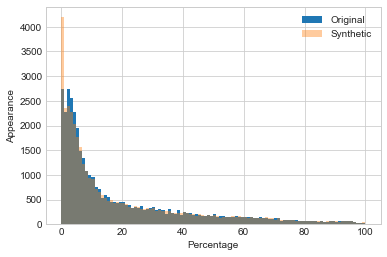

In [16]:
plt.hist(lgbt['percentage'], bins=100, label='Original');
plt.hist(lgbt_synthetic['percentage'], bins=100, alpha=.4, label='Synthetic');
plt.xlabel("Percentage")
plt.ylabel("Appearance")
plt.legend();

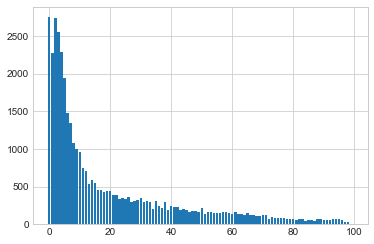

In [5]:
# from lecture notes
def range_query(df, col, a, b):
    return len(df[(df[col] >= a) & (df[col] < b)])

bins = list(range(0, 100))
counts = [range_query(lgbt, 'percentage', b, b+1) for b in bins]
plt.bar(bins, counts);

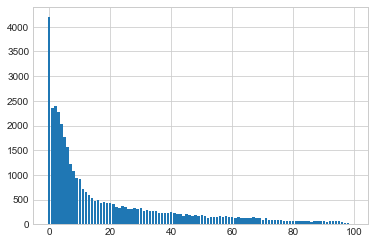

In [6]:
counts = [range_query(lgbt_synthetic, 'percentage', b, b+1) for b in bins]
plt.bar(bins, counts);

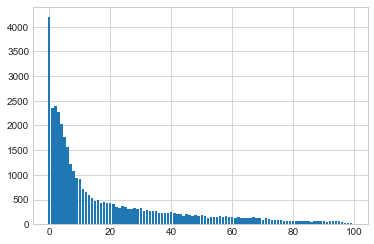

In [7]:
dp_syn_counts = [laplace_mech(c, 1, 1) for c in counts]
plt.bar(bins, dp_syn_counts);

In [8]:
def range_query_synth(syn_rep, a, b): # function from lecture notes
    total = 0
    for i in range(a, b):
        total += syn_rep[i]
    return total

original_count = range_query(lgbt, 'percentage', 50, 100)
synthetic_count = range_query_synth(dp_syn_counts, 50, 100)
print("Original: " + str(original_count))
print("Synthetic: " + str(synthetic_count))
print("Percent Error: " + str(pct_error(original_count, synthetic_count)) + "%")

Original: 4936
Synthetic: 4876.792972209722
Percent Error: 1.1994940800299354%


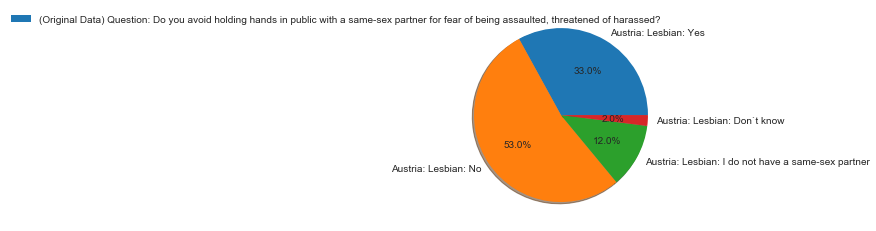

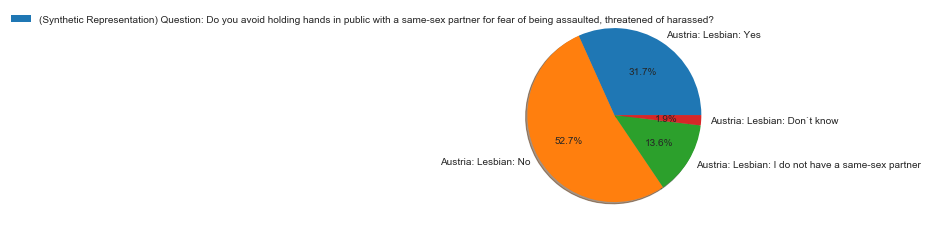

In [40]:
labels = [lgbt['CountryCode'][i] + ": " + lgbt['subset'][i] + ": " + lgbt["answer"][i] for i in range(4)]

plt.pie(lgbt['percentage'][0:4], labels=labels, autopct='%1.1f%%', shadow=True);
plt.legend(["(Original Data) Question: " + lgbt["question_label"][0]])
plt.show()
plt.pie(lgbt_synthetic['percentage'][0:4], labels=labels, autopct='%1.1f%%', shadow=True);
plt.legend(["(Synthetic Representation) Question: " + lgbt["question_label"][0]]);

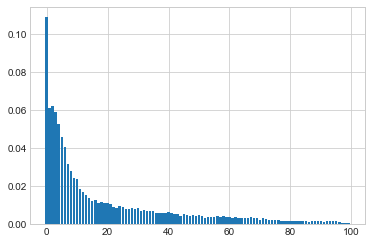

In [9]:
# dp_syn_rep_nn = np.clip(dp_syn_counts, 0, None)
# syn_normalized = dp_syn_rep_nn / np.sum(dp_syn_rep_nn)
# plt.bar(bins, syn_normalized);

In [10]:
# def gen_samples(n):
#     return np.random.choice(bins, n, p=syn_normalized)

# syn_data = pd.DataFrame(gen_samples(lgbt.shape[0]), columns=['percentage'])
# syn_data

,percentage
0,58
1,1
2,0
3,21
4,13
...,...
38453,40
38454,39
38455,1
38456,13


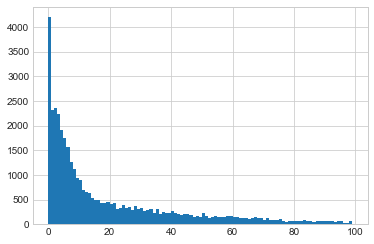

In [11]:
# plt.hist(syn_data['percentage'], bins=bins);

In [12]:
# ct = pd.crosstab(lgbt['percentage'], lgbt['subset'])
# ct

subset,Bisexual men,Bisexual women,Gay,Lesbian,Transgender
percentage,,,,,
0,575,570,584,562,458
1,185,378,788,594,326
2,378,464,799,615,484
3,439,421,712,544,434
4,345,357,652,570,358
...,...,...,...,...,...
96,8,15,13,14,3
97,4,10,9,9,0
98,4,8,6,8,3


In [13]:
# dp_ct = ct.applymap(lambda x: max(laplace_mech(x, 1, 1), 0)) # from lecture notes
# dp_vals = dp_ct.stack().reset_index().values.tolist()
# probs = [p for _,_,p in dp_vals]
# vals = [(a,b) for a,b,_ in dp_vals]
# probs_norm = probs / np.sum(probs)
# list(zip(vals, probs_norm))[0]


((0, 'Bisexual men'), 0.014904401771556584)